<a href="https://colab.research.google.com/github/Raghava2004-cpu/Logistic-Regression-Projects/blob/main/Predicting_Breast_Cancer_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN

In [6]:
data.drop(columns = ['id' , 'Unnamed: 32'] , inplace = True)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Malignant:

A malignant tumor is cancerous.
It can invade and destroy nearby tissue and spread (metastasize) to other parts of the body through the bloodstream or lymphatic system.
Malignant tumors often grow rapidly and are considered harmful.
Benign:

A benign tumor is non-cancerous.
It does not spread to other parts of the body and usually grows slowly.
Benign tumors are generally not life-threatening unless they press on vital organs or structures.

In [8]:
(data['diagnosis'].unique())

array(['M', 'B'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['diagnosis'] = label.fit_transform(data['diagnosis'])

In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

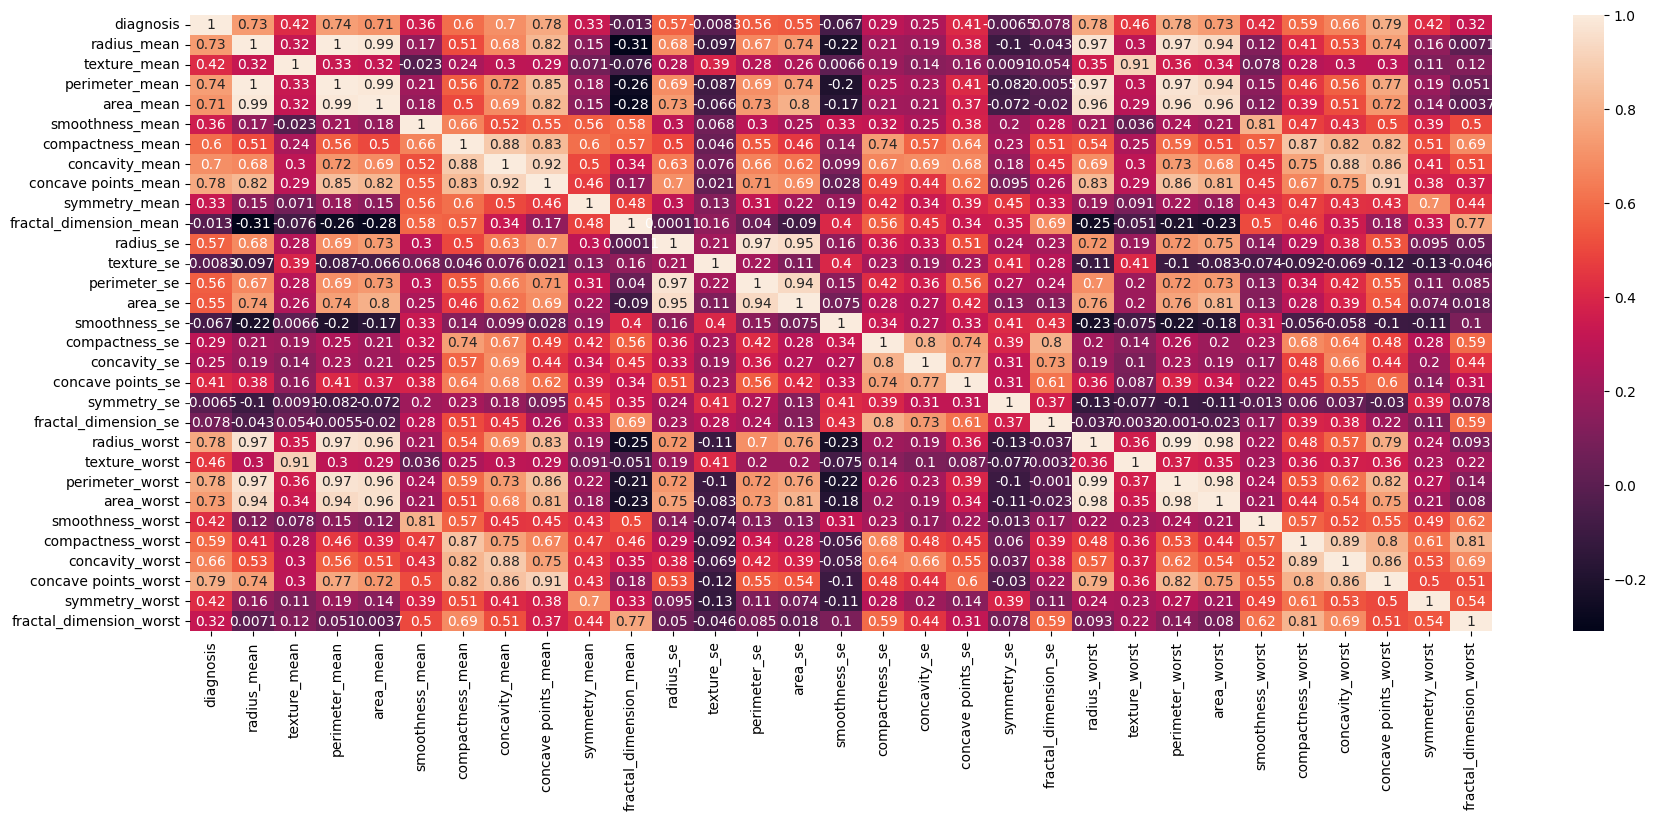

In [12]:
corr = data.corr()
plt.figure(figsize = (21,8))
sns.heatmap(corr , annot = True)

In [13]:
from sklearn.model_selection import train_test_split

x = data.drop(columns = ['diagnosis'])
y = data['diagnosis']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
x_train_scale = scaling.fit_transform(x_train)
x_test_scale = scaling.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 5000)
model.fit(x_train_scale , y_train)


LogisticRegression(max_iter=5000)

In [16]:
y_pred = model.predict(x_test_scale)

In [17]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , precision_score , recall_score , roc_auc_score

print("Accuracy Score : ", accuracy_score(y_test , y_pred))
print(f"Confusion Matrix : {confusion_matrix(y_test , y_pred)} " )
print(f"Precision Score : {precision_score(y_test , y_pred)} ")
print(f"Recall Score : {recall_score(y_test , y_pred)}")
print(f"ROC AUC SCORE :  {roc_auc_score(y_test , y_pred)}")

Accuracy Score :  0.9790209790209791
Confusion Matrix : [[87  2]
 [ 1 53]] 
Precision Score : 0.9636363636363636 
Recall Score : 0.9814814814814815
ROC AUC SCORE :  0.9795047856845608


<Axes: >

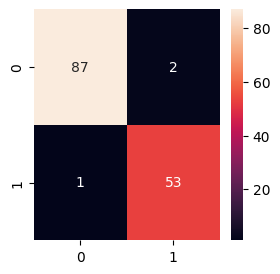

In [18]:
cn = confusion_matrix(y_test , y_pred)
plt.figure(figsize = (3,3))
sns.heatmap(cn , annot = True)

USING THE L1 REGULARIZATION

In [19]:
model1 = LogisticRegression(penalty = 'l1' , solver = 'liblinear' , C = 0.1 , random_state = 42 , max_iter = 5000)
model1.fit(x_train_scale , y_train)   #use only liblinear in l1 ...l1 dont support lbfgs
y_pred = model.predict(x_test_scale)

In [20]:
print("Accuracy Score : ", accuracy_score(y_test , y_pred))
print(f"Confusion Matrix : {confusion_matrix(y_test , y_pred)} " )
print(f"Precision Score : {precision_score(y_test , y_pred)} ")
print(f"Recall Score : {recall_score(y_test , y_pred)}")
print(f"ROC AUC SCORE :  {roc_auc_score(y_test , y_pred)}")

Accuracy Score :  0.9790209790209791
Confusion Matrix : [[87  2]
 [ 1 53]] 
Precision Score : 0.9636363636363636 
Recall Score : 0.9814814814814815
ROC AUC SCORE :  0.9795047856845608


USING THE L2 REGULARIZATION

In [21]:
model2 = LogisticRegression(penalty = 'l2' , solver = 'lbfgs' , C = 0.1 , random_state = 42 , max_iter = 5000)
model1.fit(x_train_scale , y_train)
y_pred = model.predict(x_test_scale)

In [22]:
print("Accuracy Score : ", accuracy_score(y_test , y_pred))
print(f"Confusion Matrix : {confusion_matrix(y_test , y_pred)} " )
print(f"Precision Score : {precision_score(y_test , y_pred)} ")
print(f"Recall Score : {recall_score(y_test , y_pred)}")
print(f"ROC AUC SCORE :  {roc_auc_score(y_test , y_pred)}")

Accuracy Score :  0.9790209790209791
Confusion Matrix : [[87  2]
 [ 1 53]] 
Precision Score : 0.9636363636363636 
Recall Score : 0.9814814814814815
ROC AUC SCORE :  0.9795047856845608


USING THE ELASTIC NET REGULARIZATION

In [23]:
model3 = LogisticRegression(penalty = 'elasticnet' , l1_ratio = 0.5 , solver = 'saga' , C = 0.01 , random_state = 42 , max_iter = 5000)

model3.fit(x_train_scale , y_train)
y_pred = model.predict(x_test_scale)

In [24]:
print("Accuracy Score : ", accuracy_score(y_test , y_pred))
print(f"Confusion Matrix : {confusion_matrix(y_test , y_pred)} " )
print(f"Precision Score : {precision_score(y_test , y_pred)} ")
print(f"Recall Score : {recall_score(y_test , y_pred)}")
print(f"ROC AUC SCORE :  {roc_auc_score(y_test , y_pred)}")

Accuracy Score :  0.9790209790209791
Confusion Matrix : [[87  2]
 [ 1 53]] 
Precision Score : 0.9636363636363636 
Recall Score : 0.9814814814814815
ROC AUC SCORE :  0.9795047856845608


In [25]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits = 10 , shuffle = True , random_state = 42)
new_model = LogisticRegression(penalty = 'l1' , C = 0.1 , solver = 'liblinear', random_state = 42 , max_iter = 5000 )

best_accuracy = 0
best_fold_data = None

for fold , (train_index , test_index) in enumerate(kf.split(x)):
   x_train , x_test = x.iloc[train_index] , x.iloc[test_index]
   y_train , y_test = y.iloc[train_index]  , y.iloc[test_index]

   scaled = StandardScaler()
   x_train_scaled = scaled.fit_transform(x_train)
   x_test_scaled = scaled.transform(x_test)

   new_model.fit(x_train_scaled , y_train)

   y_predi = new_model.predict(x_test_scaled)

   accuracy = accuracy_score(y_test , y_predi)

   if accuracy > best_accuracy :
      best_accuracy = accuracy
      best_fold_data = (x_train , x_test , y_train , y_test)
   print(f"Accuracy Score {fold+1} : {accuracy}")

print(f"Among all the data best accuracy is : {best_accuracy}")
if best_fold_data :
  x_train , x_test , y_train , y_test = best_fold_data

print(x_train)  # printing the best train data from main data so that i can use this train data to fit the model
print(y_train)

Accuracy Score 1 : 0.9649122807017544
Accuracy Score 2 : 0.9649122807017544
Accuracy Score 3 : 1.0
Accuracy Score 4 : 0.9824561403508771
Accuracy Score 5 : 0.9473684210526315
Accuracy Score 6 : 0.9473684210526315
Accuracy Score 7 : 1.0
Accuracy Score 8 : 0.9824561403508771
Accuracy Score 9 : 0.9649122807017544
Accuracy Score 10 : 0.9464285714285714
Among all the data best accuracy is : 1.0
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
5          12.45         15.70           82.57      477.1          0.12780   
..           ...           ...             ...        ...              ...   
563        20.92         25.09          143.00     1347.0    

In [26]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale =  scaler.transform(x_test)

new_model.fit(x_train_scale , y_train)
result = new_model.predict(x_test_scale)
print("Accuracy Score : ", accuracy_score(y_test , result)*100.0)
print(f"Confusion Matrix : {confusion_matrix(y_test , result)} " )
print(f"Precision Score : {precision_score(y_test , result)*100.0} ")
print(f"Recall Score : {recall_score(y_test , result)*100.0}")
print(f"ROC AUC SCORE :  {roc_auc_score(y_test , result)*100.0}")

Accuracy Score :  100.0
Confusion Matrix : [[37  0]
 [ 0 20]] 
Precision Score : 100.0 
Recall Score : 100.0
ROC AUC SCORE :  100.0


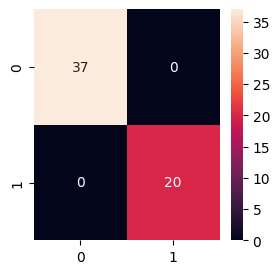

In [27]:
cn = confusion_matrix(y_test , result)
plt.figure(figsize = (3,3))
sns.heatmap(cn , annot = True)
plt.show()

In [28]:
print(new_model.intercept_)

[-0.26422299]


In [29]:
coef_df = pd.DataFrame({
     'Feature Names ' : x_train.columns,
     'Coefficients'   : new_model.coef_.flatten()
})
coef_df.sort_values('Coefficients' , ascending = False )

,Feature Names,Coefficients
20,radius_worst,2.095522
27,concave points_worst,0.883757
7,concave points_mean,0.665116
21,texture_worst,0.626411
10,radius_se,0.588997
24,smoothness_worst,0.172663
28,symmetry_worst,0.149285
26,concavity_worst,0.073635
0,radius_mean,0.000000
16,concavity_se,0.000000


In [30]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits = 10 , shuffle = True , random_state = 42)
new_model = LogisticRegression(penalty = 'l2' , C = 0.1 , solver = 'lbfgs', random_state = 42 , max_iter = 5000 )

best_accuracy = 0
best_fold_data = None

for fold , (train_index , test_index) in enumerate(kf.split(x)):
   x_train , x_test = x.iloc[train_index] , x.iloc[test_index]
   y_train , y_test = y.iloc[train_index]  , y.iloc[test_index]

   scaled = StandardScaler()
   x_train_scaled = scaled.fit_transform(x_train)
   x_test_scaled = scaled.transform(x_test)

   new_model.fit(x_train_scaled , y_train)

   y_predi = new_model.predict(x_test_scaled)

   accuracy = accuracy_score(y_test , y_predi)

   if accuracy > best_accuracy :
      best_accuracy = accuracy
      best_fold_data = (x_train , x_test , y_train , y_test)
   print(f"Accuracy Score {fold+1} : {accuracy}")

print(f"Among all the data best accuracy is : {best_accuracy}")
if best_fold_data :
  x_train , x_test , y_train , y_test = best_fold_data

print(x_train)  # printing the best train data from main data so that i can use this train data to fit the model
print(y_train)

Accuracy Score 1 : 0.9824561403508771
Accuracy Score 2 : 0.9824561403508771
Accuracy Score 3 : 1.0
Accuracy Score 4 : 0.9824561403508771
Accuracy Score 5 : 0.9824561403508771
Accuracy Score 6 : 0.9649122807017544
Accuracy Score 7 : 0.9824561403508771
Accuracy Score 8 : 0.9649122807017544
Accuracy Score 9 : 0.9649122807017544
Accuracy Score 10 : 0.9464285714285714
Among all the data best accuracy is : 1.0
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
5          12.45         15.70           82.57      477.1          0.12780   
..           ...           ...             ...        ...              ...   
563        20.92         25.09          143.00

In [31]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale =  scaler.transform(x_test)

new_model.fit(x_train_scale , y_train)
result = new_model.predict(x_test_scale)
print("Accuracy Score : ", accuracy_score(y_test , result)*100.0)
print(f"Confusion Matrix : {confusion_matrix(y_test , result)} " )
print(f"Precision Score : {precision_score(y_test , result)*100.0} ")
print(f"Recall Score : {recall_score(y_test , result)*100.0}")
print(f"ROC AUC SCORE :  {roc_auc_score(y_test , result)*100.0}")

Accuracy Score :  100.0
Confusion Matrix : [[37  0]
 [ 0 20]] 
Precision Score : 100.0 
Recall Score : 100.0
ROC AUC SCORE :  100.0


In [32]:
print(new_model.intercept_)

[-0.5111573]


In [33]:
coef_df = pd.DataFrame({
     'Feature Names ' : x_train.columns,
     'Coefficients'   : new_model.coef_.flatten()
})
coef_df.sort_values('Coefficients' , ascending = False )

,Feature Names,Coefficients
21,texture_worst,0.567332
27,concave points_worst,0.525867
20,radius_worst,0.508430
10,radius_se,0.495292
22,perimeter_worst,0.470123
7,concave points_mean,0.464027
23,area_worst,0.458794
26,concavity_worst,0.436034
28,symmetry_worst,0.414135
24,smoothness_worst,0.401398
